# Module 1, Practical 10
## Part 1
Some years ago, researchers collected a dataset called ["Copenhagen Network study"](https://figshare.com/articles/dataset/The_Copenhagen_Networks_Study_interaction_data/7267433). They collected several informations among 700 universitary students. In this exam, we are intrested in:

1. the list of phone calls [calls.csv](DTU/calls.csv)
3. Information about Facebook friendships [fb_friends.csv](DTU/fb_friends.csv)
4. The gender of the students [genders.txt](DTU/genders.txt)

the data are like follows: 

**calls.csv**
```
timestamp,caller,callee,duration
184,300,301,121
3920,512,299,670
```
**fb_friends.csv**
```
# user_a,user_b
0,512
0,263
0,525
```
**gender.txt**
```
0_M 2_M 3_M 4_M 5_M ...
```

you have to write a program that computes the following:

1. Search for the call with the longest duration.
2. Are the caller and the callee friend on Facebook?
3. Print the gender of the students belonging to the longest call
4. Interactions are given in seconds, you have to discretize them! Each interactions appening in 1 houar have to be discretized into 1. for instance 
input CALLS
```
    time  id_a id_b duration
[
    [  184,   300,   301,   121],
    [ 3920,   512,   299,   670],
    [ 5623,   301,   300,   504],
    [ 9252,   401,   457,    -1],
    [15466,   512,     0,     5],
    [15497,   512,     0,    28],
    [26400,    19,    47,   619],
    [31312,   687,   310,    11],
    [36265,   300,   301,    74],
    [37049,   634,   681,    20],
   ...,                                              
]
```
output CALLS
```
    time  id_a id_b duration
[
    [  0,   300,   301,   121],
    [  1,   512,   299,   670],
    [  1,   301,   300,   504],
    [  2,   401,   457,    -1],
    [  4,   512,     0,     5],
    [  4,   512,     0,    28],
    [  7,    19,    47,   619],
    [  8,   687,   310,    11],
    [ 10,   300,   301,    74],
    [ 10,   634,   681,    20],
   ...,                                              
]
```
5. then plot those interactions, you should obtain a plot like the one bellow! pay attention to x and y labels
![nb_interactions](DTU/nb_interactions.png)


**NOTE** you should define a function for each point.


<div class="tggle" onclick="toggleVisibility('ex1');">Show/Hide Solution</div>
<div id="ex1" style="display:none;">

1) the longest call is: 136 and 137


/tmp/ipykernel_34290/2122565101.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  user_a = i[0]
/tmp/ipykernel_34290/2122565101.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  user_b = i[1]


2) 137  and  136  are friend of FB
3)
gender of  137  =  F
gender of  136  =  M


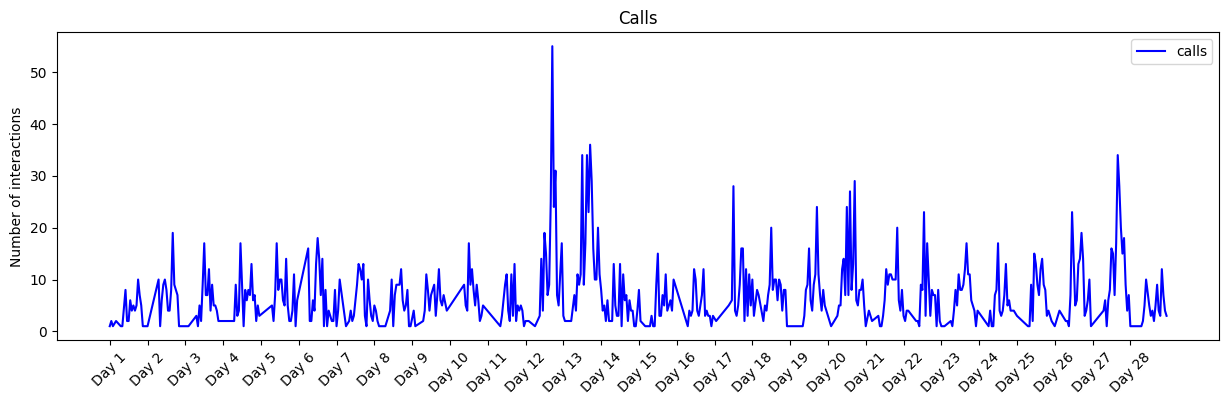

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def get_longest_call(calls):
    longest_call = calls.loc[calls['duration'].idxmax()]
    id_caller, id_callee = longest_call.caller,longest_call.callee
    return id_caller,id_callee


def get_friends_fb(fb):
    fb_friends = []
    for _,i in fb.iterrows():
        user_a = i[0]
        user_b = i[1]
        fb_friends.append((user_a,user_b))
        
    return fb_friends

def get_gender(gender,id_caller,id_callee):
    print("gender of ",id_callee," = ",gender[id_callee])
    print("gender of ",id_caller," = ",gender[id_caller])   

def get_sms_count_dict(sms):
    sms_count = dict()
    for _,i in sms.iterrows():
        _,sender,reciver = i

        if sender > reciver:
            tmp = sender
            sender = reciver
            reciver = tmp

        if (sender,reciver) in sms_count:
            sms_count[(sender,reciver)] += 1
        else:
            sms_count[(sender,reciver)] = 1

    return sms_count


def get_tot_messages(sms_count,fb_friends):
    tot_messages = 0
    for k,v in sms_count.items():
        id_a, id_b = k

        if not (id_a,id_b) in fb_friends:
            if not (id_b,id_a) in fb_friends:
                tot_messages += v
    return tot_messages

def load_gender(path):
    f = open(path, "r")
    data = f.read()
    f.close()
    res = dict()
    for el in data.split(" "):
        tmp = el.split("_")
        idx = tmp[0]
        gender = tmp[1]
        res[int(idx)] = gender
    return res

def get_discretized_times(calls_small):
    times_call = []
    

    for t,a,b,d in calls_small.to_numpy():
        times_call.append(int(t/(60*60)))
    
    return times_call

def my_plot(times_call):
    
    t_c,count_c = np.unique(times_call,return_counts=True)

    x_ticks = []
    x_labels = []
    for i in range(int((max(t_c)/24)+1)):
        x_ticks.append(i*24)
        x_labels.append("Day "+str(i+1))

    plt.figure(figsize=(15,4))
    plt.plot(t_c,count_c,label="calls",color="blue")
    plt.ylabel("Number of interactions")
    plt.xticks(x_ticks, x_labels,rotation=45)
    plt.title("Calls")
    plt.legend()
    plt.savefig("nb_interactions.png")
    plt.show()



# load data
fb = pd.read_csv("DTU/fb_friends.csv")
calls = pd.read_csv("DTU/calls.csv")


# 1)
id_caller, id_callee = get_longest_call(calls)
print("1)","the longest call is:",id_caller, "and", id_callee)

# 2)
fb_friends = get_friends_fb(fb)    
if (id_callee,id_caller) in fb_friends or (id_caller,id_callee) in fb_friends:
    print("2)",id_callee," and ",id_caller," are friend of FB")

# 3)
print("3)")
gender = load_gender("DTU/gender.txt")
get_gender(gender,id_caller,id_callee)

# 4) 
times_call = get_discretized_times(calls)
my_plot(times_call)

</div>